In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

# Import Dependencies

In [2]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

# Read in Dataset

In [3]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Data Exploration

- _info()_ output confirms there are no __NULL__ values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [5]:
len(df)

6991

In [6]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


In [7]:
df.shape

(6991, 41)

- Predicted value will be __koi_disposition__
- There are three possible values for __koi_disposition__
- These values are not equally distributed so statification will be applied

In [8]:
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

# Label Encoding

- label encoded applied to the __y target__ _(koi_disposition)_
- __koi_disposition_label__ will be the new target
- the objective will be to predict a number for __koi_disposition_label__

In [9]:
labels = {"FALSE POSITIVE": 0, "CONFIRMED": 1, "CANDIDATE": 2}

df["koi_disposition_label"] = [labels[x] for x in df.koi_disposition]
df = df.drop("koi_disposition", axis=1)

df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


# Identify Correlation between Fields

In [10]:
corrs = df.corr()
corrs

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,-0.380710
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,-0.486481
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,-0.452002
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,-0.339983
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,-0.023592
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,-0.047197
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,0.047197
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,0.009463
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119,0.029161
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119,-0.029161


### Correlation Heatmap of All Fields

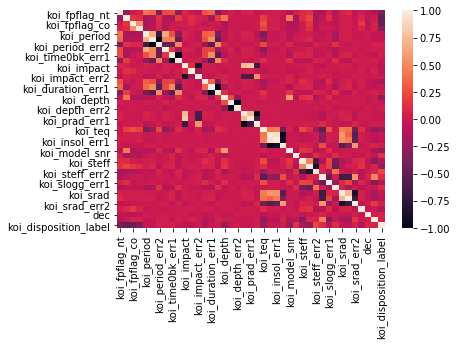

In [11]:
sn.heatmap(corrs)

### Identify the Fields Strong Correlated with the Target _koi_disposition_label_

- set a threshold of 0.1
- any fields with a correlation < 0.1 are considered not significant

In [12]:
abs(corrs["koi_disposition_label"]).sort_values(ascending=False)

koi_disposition_label    1.000000
koi_fpflag_ss            0.486481
koi_fpflag_co            0.452002
koi_fpflag_nt            0.380710
koi_fpflag_ec            0.339983
koi_steff_err1           0.254084
koi_depth                0.244109
koi_teq                  0.237782
koi_model_snr            0.233840
koi_steff_err2           0.232041
koi_tce_plnt_num         0.135711
koi_duration             0.134811
koi_steff                0.133363
ra                       0.117899
koi_slogg_err2           0.104482
koi_slogg                0.101181
koi_slogg_err1           0.099996
koi_srad_err1            0.077580
dec                      0.072855
koi_impact               0.067744
koi_impact_err1          0.065843
koi_kepmag               0.054859
koi_srad_err2            0.053862
koi_period_err2          0.047197
koi_period_err1          0.047197
koi_srad                 0.045170
koi_prad_err1            0.035515
koi_insol_err1           0.031934
koi_time0bk_err2         0.029161
koi_time0bk_er

# Feature Selection

In [13]:
features = list(corrs["koi_disposition_label"].loc[abs(corrs["koi_disposition_label"]) > .1].index)
features = features[0:len(features)-1]
features

['koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_duration',
 'koi_depth',
 'koi_teq',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err2',
 'ra']

In [14]:
target_col = "koi_disposition_label"

# Explore Distribution of Features

- render histogram for each feature
- many features not normally distributed

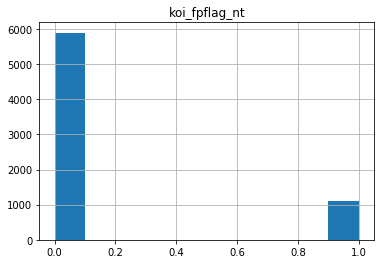

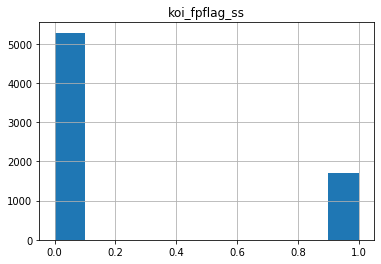

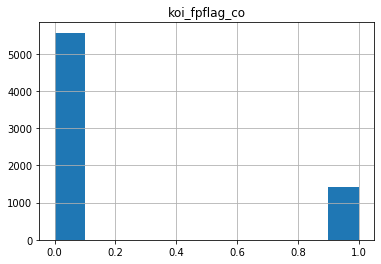

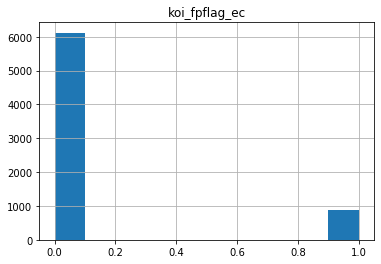

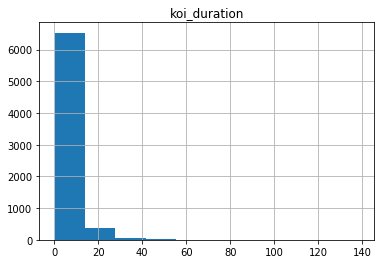

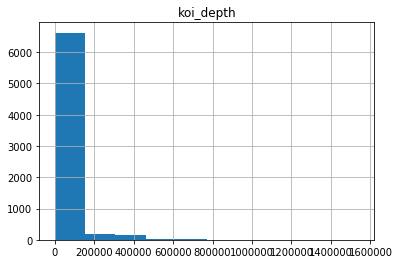

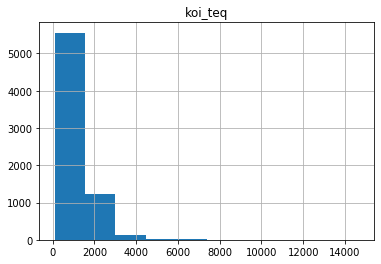

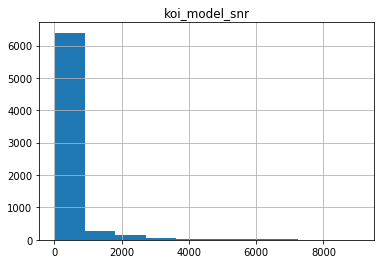

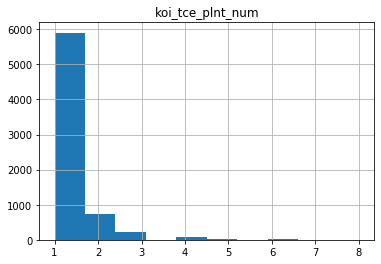

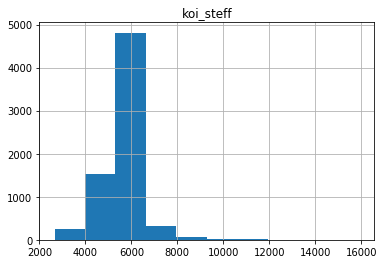

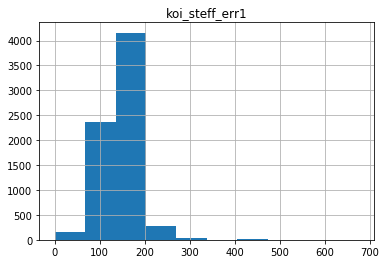

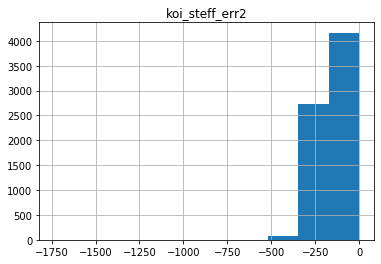

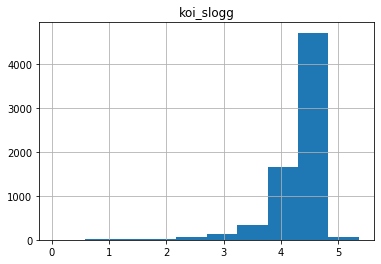

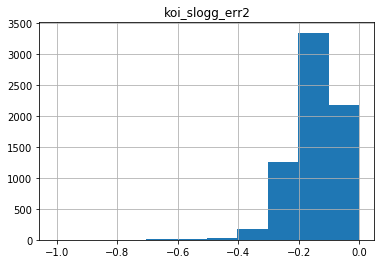

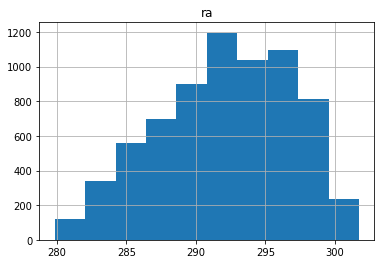

In [15]:
for col in features:
    df[[col]].hist()

# Split Data into Training & Test Sets

In [16]:
#split the data
data = df[features]
target = df[target_col]

#stratify for unequal target weights
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target, test_size=0.2)

In [17]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Confirm Size of Training & Test Set

- 80/20 split

In [18]:
print(f"Training Rows: {len(y_train)}")
print(f"Testing Rows: {len(y_test)}")

Training Rows: 5592
Testing Rows: 1399


# Linear Models


## Logistic

- good at predicting __FALSE POSITIVE__
- not as accurate predicting __CANDIDATE & CONFIRMED__

Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.66      0.69      0.67       360
           2       0.65      0.59      0.62       338

    accuracy                           0.82      1399
   macro avg       0.76      0.76      0.76      1399
weighted avg       0.82      0.82      0.82      1399


Confusion Matrix:
[[698   0   3]
 [  5 250 105]
 [  7 131 200]]


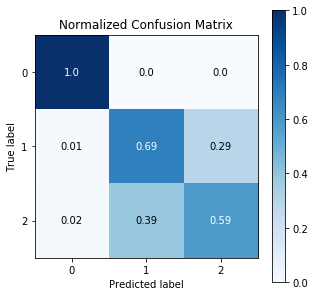


ROC Curve:


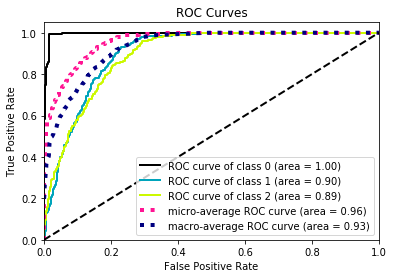

In [19]:
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

## KNN

- Identify optimal k-value for n
- Worse performance than __Logistic__ model

k: 1, Train/Test Score: 1.000/0.798
k: 3, Train/Test Score: 0.898/0.800
k: 5, Train/Test Score: 0.868/0.809
k: 7, Train/Test Score: 0.852/0.813
k: 9, Train/Test Score: 0.845/0.818
k: 11, Train/Test Score: 0.844/0.813
k: 13, Train/Test Score: 0.839/0.810
k: 15, Train/Test Score: 0.843/0.811
k: 17, Train/Test Score: 0.841/0.814
k: 19, Train/Test Score: 0.842/0.809


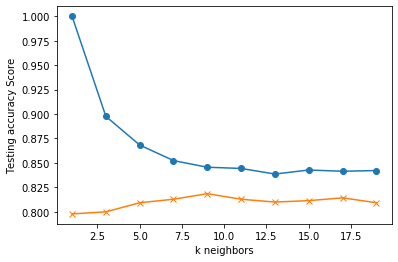

In [20]:
 train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.63      0.80      0.70       360
           2       0.70      0.47      0.56       338

    accuracy                           0.82      1399
   macro avg       0.77      0.75      0.75      1399
weighted avg       0.82      0.82      0.81      1399


Confusion Matrix:
[[696   3   2]
 [  6 287  67]
 [ 10 168 160]]


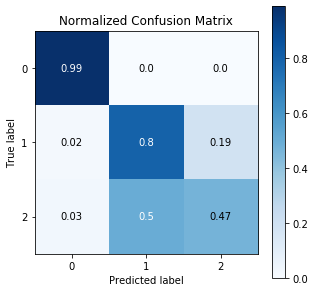


ROC Curve:


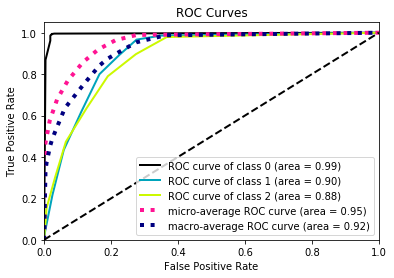

In [21]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

 ## SVM
 
 - SVM may be chosen over the __Logistic__ model
 - __Logistic__ model has the advantage of being less complex

SVM Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.67      0.68      0.67       360
           2       0.65      0.62      0.63       338

    accuracy                           0.82      1399
   macro avg       0.77      0.76      0.77      1399
weighted avg       0.82      0.82      0.82      1399


Confusion Matrix:
[[698   0   3]
 [  6 246 108]
 [  7 123 208]]


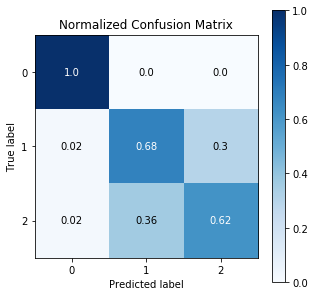


ROC Curve:


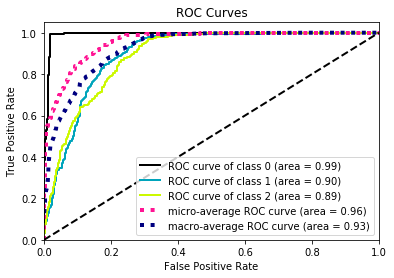

In [22]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

# Ensemble/Tree Models

## Decision Tree

- Produces better Accuracy scores than the __Logistics__ model
- However, ROC curve illustrates it is not good at predicting __CONFIRMED (1)__ & __CANDIDATE (2)__

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       701
           1       0.74      0.71      0.72       360
           2       0.69      0.74      0.72       338

    accuracy                           0.85      1399
   macro avg       0.80      0.81      0.80      1399
weighted avg       0.85      0.85      0.85      1399


Confusion Matrix:
[[678  12  11]
 [  4 255 101]
 [  8  79 251]]


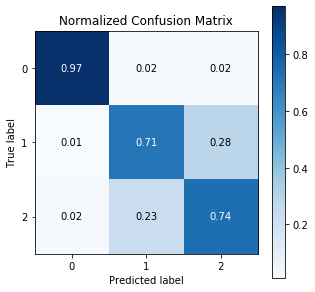


ROC Curve:


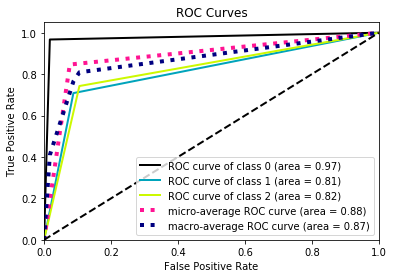

In [23]:
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

## Bagging Classifier

- High accuracy scores
- good ROC curve
- Better performance than __Decision Tree__

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.77      0.81      0.79       360
           2       0.78      0.73      0.76       338

    accuracy                           0.88      1399
   macro avg       0.85      0.84      0.84      1399
weighted avg       0.88      0.88      0.88      1399


Confusion Matrix:
[[697   1   3]
 [  5 290  65]
 [  7  84 247]]


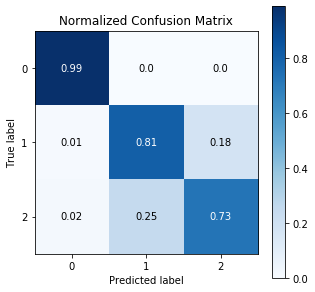


ROC Curve:


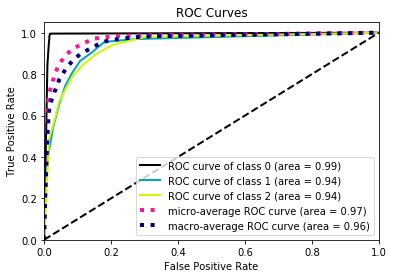

In [24]:
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

## Random Forest Classifier

- High accuracy scores
- good ROC curve
- Better performance than __Bagging Classifier__

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.81      0.82      0.81       360
           2       0.81      0.76      0.78       338

    accuracy                           0.89      1399
   macro avg       0.86      0.86      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[698   0   3]
 [  6 295  59]
 [  9  71 258]]


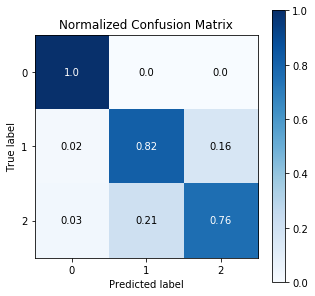


ROC Curve:


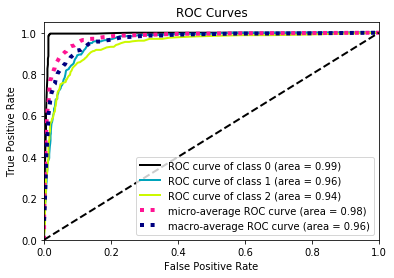

In [25]:
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

### Random Forest Feature Importances

- last 4 features with a value greater than 0.1 are the most important
- __koi_model_snr, koi_fpflag_nt, koi_fpflag_co, koi_fpflag_ss__
- another iteration could be executed, dropping features that do not add significant value
- dropping features would have the benefit of reducing complexity

In [26]:
sorted(list(zip(rfc.feature_importances_, data.columns)))

[(0.009580166257352462, 'koi_tce_plnt_num'),
 (0.03184889259271933, 'ra'),
 (0.0323738032769389, 'koi_steff'),
 (0.0343727922010874, 'koi_slogg_err2'),
 (0.04038414062765222, 'koi_slogg'),
 (0.041963934120401974, 'koi_fpflag_ec'),
 (0.045775179428224635, 'koi_duration'),
 (0.057716987951298704, 'koi_steff_err2'),
 (0.05953557837965556, 'koi_steff_err1'),
 (0.06067485700833771, 'koi_teq'),
 (0.07938090566935596, 'koi_depth'),
 (0.11662687879123262, 'koi_fpflag_ss'),
 (0.12125989265240114, 'koi_fpflag_nt'),
 (0.1295814085431288, 'koi_fpflag_co'),
 (0.1389245825002124, 'koi_model_snr')]

## Ada Boost Classifier

- this model is useful when the model has _overfit_ the data
- _overfitting_ is not a problem in this use case
- as expected, __Ada__ does not perform well

Ada Boost Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       701
           1       0.60      0.79      0.68       360
           2       0.75      0.66      0.70       338

    accuracy                           0.80      1399
   macro avg       0.78      0.78      0.77      1399
weighted avg       0.83      0.80      0.81      1399


Confusion Matrix:
[[616  83   2]
 [  4 285  71]
 [  7 108 223]]


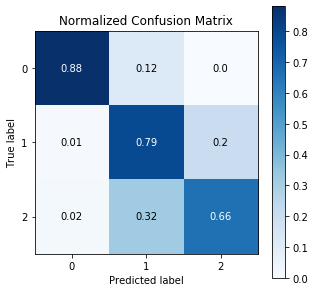


ROC Curve:


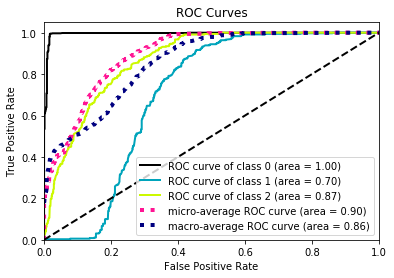

In [27]:
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

## Gradient Boosting Classifier

- better performance than __Random Forest__

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       701
           1       0.80      0.82      0.81       360
           2       0.81      0.76      0.78       338

    accuracy                           0.89      1399
   macro avg       0.86      0.86      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[698   0   3]
 [  6 295  59]
 [  7  74 257]]


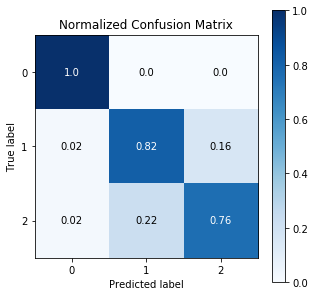


ROC Curve:


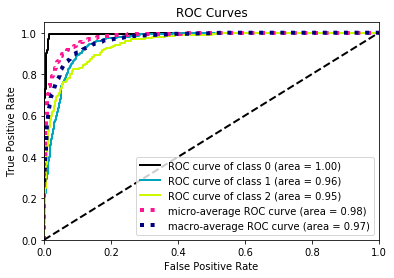

In [28]:
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

## XTREME Gradient Boosting Classifier

- slightly better performance than __Gradient Boosting Classifier__

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       701
           1       0.80      0.81      0.80       360
           2       0.79      0.77      0.78       338

    accuracy                           0.89      1399
   macro avg       0.86      0.86      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[697   1   3]
 [  4 290  66]
 [  7  71 260]]


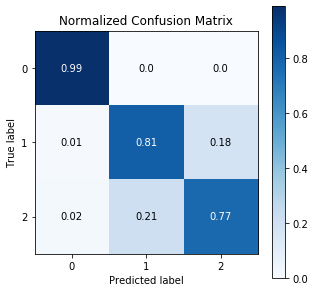


ROC Curve:


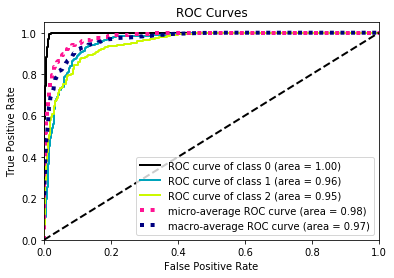

In [29]:
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

#plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(y_test, preds, normalize=True, ax=ax) #plot
plt.show()
print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

### Xtreme Gradient Boost Feature Importances

- __koi_fpflag_nt, koi_fpflag_co & koi_fpflag_ss__ are assigned greater importance for XGBoost in comparison to __Random Forest Model__

In [30]:
sorted(list(zip(xgbc.feature_importances_, data.columns)))

[(0.004275965, 'koi_steff_err2'),
 (0.0044867606, 'koi_slogg_err2'),
 (0.0047972067, 'koi_steff'),
 (0.0049339933, 'ra'),
 (0.005750119, 'koi_depth'),
 (0.0057993326, 'koi_teq'),
 (0.006719483, 'koi_duration'),
 (0.0070788497, 'koi_slogg'),
 (0.011660523, 'koi_tce_plnt_num'),
 (0.019885741, 'koi_model_snr'),
 (0.02210336, 'koi_steff_err1'),
 (0.08060316, 'koi_fpflag_ec'),
 (0.2209418, 'koi_fpflag_ss'),
 (0.28059277, 'koi_fpflag_co'),
 (0.320371, 'koi_fpflag_nt')]

# Model Selection

- XGBoost demonstrates the best performance

In [31]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(data)
X_scaled_prod = X_scaler_prod.transform(data)

EXTREME Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3504
           1       0.99      1.00      0.99      1800
           2       1.00      0.99      0.99      1687

    accuracy                           1.00      6991
   macro avg       1.00      1.00      1.00      6991
weighted avg       1.00      1.00      1.00      6991


Confusion Matrix:
[[3504    0    0]
 [   0 1799    1]
 [   0   21 1666]]

ROC Curve:


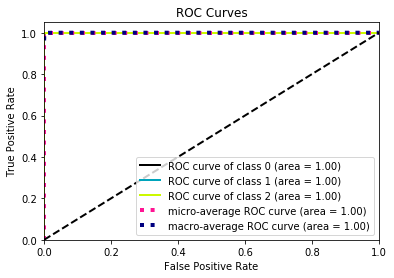

In [32]:
xgbc = XGBClassifier() #init
xgbc.fit(X_scaled_prod, target) #fit
preds = xgbc.predict(X_scaled_prod) #predict
proba_preds = xgbc.predict_proba(X_scaled_prod) #predict

print("EXTREME Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(target, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(target, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(target, proba_preds) 
plt.show()

## Xtreme Gradient Boost Feature Importances

In [33]:
sorted(list(zip(xgbc.feature_importances_, data.columns)))

[(0.004207167, 'koi_slogg_err2'),
 (0.004352569, 'ra'),
 (0.0045687626, 'koi_steff'),
 (0.0048175673, 'koi_steff_err2'),
 (0.0054918323, 'koi_teq'),
 (0.0059561906, 'koi_depth'),
 (0.00624517, 'koi_duration'),
 (0.0069831023, 'koi_slogg'),
 (0.0103593655, 'koi_tce_plnt_num'),
 (0.019542493, 'koi_model_snr'),
 (0.02144179, 'koi_steff_err1'),
 (0.07723615, 'koi_fpflag_ec'),
 (0.23635499, 'koi_fpflag_ss'),
 (0.27767557, 'koi_fpflag_co'),
 (0.31476724, 'koi_fpflag_nt')]

## Save the Scaler

In [34]:
filename = 'finalized_scaler.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))

# Save the Model

In [35]:
filename = 'finalized_model.sav'
pickle.dump(bagc, open(filename, 'wb'))